# 正規分布 - pymc3

In [7]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

## 正規分布の期待値と分散を推定する

$$X \sim N(\mu, \sigma^2)$$

- 試行回数は100回
- 仕込みとして，$\mu = 10, \sigma = 2$の正規分布を観測データとして利用する

(array([  3.,   7.,  10.,  16.,  21.,  17.,  14.,   4.,   5.,   3.]),
 array([  5.5478,   6.408 ,   7.2683,   8.1285,   8.9888,   9.8491,
         10.7093,  11.5696,  12.4298,  13.2901,  14.1504]),
 <a list of 10 Patch objects>)

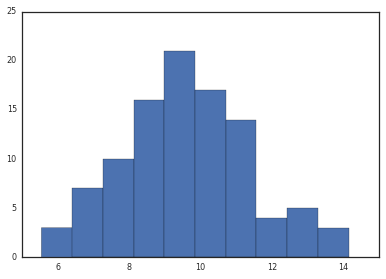

In [21]:
# 観測データを生成
N = 100
_mu = np.array([10])
_sigma = np.array([2])
y = np.random.normal(_mu, _sigma, N)
plt.hist(y)

 [-----------------100%-----------------] 1000 of 1000 complete in 0.9 sec

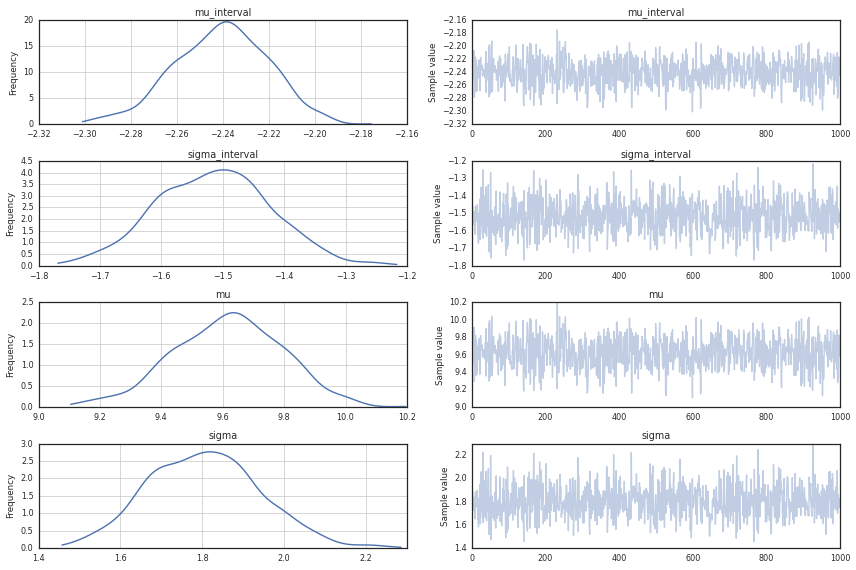

In [22]:
niter = 1000
with pm.Model() as model:
    # 事前分布
    mu = pm.Uniform('mu', lower=0, upper=100, shape=_mu.shape)
    sigma = pm.Uniform('sigma', lower=0, upper=10, shape=_sigma.shape)

    # 尤度
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=y)

    # 推定
    start = pm.find_MAP()
    step = pm.Slice()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace)

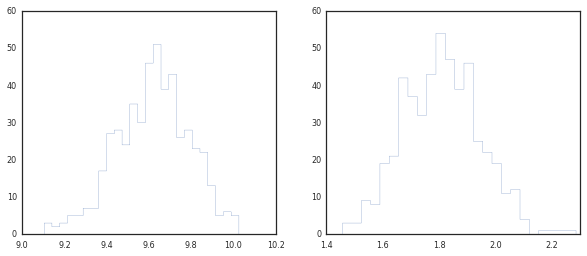

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
plt.hist(trace['mu'][-niter/2:,0], 25, histtype='step');
plt.subplot(1,2,2);
plt.hist(trace['sigma'][-niter/2:,0], 25, histtype='step');